In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from kmeans import *

In [2]:
def draw_clusters(clusters):
    points_x = []
    points_y = []
    labels = []
    for i, c in enumerate(clusters):
        for p_i in c[1]:
            points_x.append(a[p_i][0])
            points_y.append(a[p_i][1])
            labels.append(i)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(points_x, points_y, c=labels, cmap='viridis', s=200)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Data Points with Labels')
    plt.show()

In [3]:
a = np.array([
    [1.0, 1.1], [1.1, 0.9], [0.9, 1.2], [1.2, 1.0], [0.8, 1.0],
    [1.1, 1.2], [0.9, 0.8], [1.0, 1.3], [1.3, 0.9], [0.7, 1.1],
    
    [5.0, 5.1], [5.1, 4.9], [4.9, 5.2], [5.2, 5.0], [4.8, 5.0],
    [5.1, 5.2], [4.9, 4.8], [5.0, 5.3], [5.3, 4.9], [4.7, 5.1],
    
    [9.0, 1.1], [9.1, 0.9], [8.9, 1.2], [9.2, 1.0], [8.8, 1.0],
    [9.1, 1.2], [8.9, 0.8], [9.0, 1.3], [9.3, 0.9], [8.7, 1.1]
])

1.0989782222920843
0.9890804000628758
0.8901723600565883
0.8011551240509295
0.7210396116458365
0.6489356504812528
0.5840420854331275
0.5256378768898148
0.4730740892008334
0.4257666802807499
0.383190012252675
0.34487101102740736
0.3103839099246667
0.2793455189322001
0.2514109670389802
0.2262698703350822
0.20364288330157385
0.1832785949714164
0.16495073547427486
0.14845566192684723
0.16226898923173297
0.14604209030855977
0.1314378812777037
0.11829409314993329
0.10646468383494002
0.09581821545144592
0.08623639390630138
0.07761275451567125
0.06985147906410401
0.06286633115769362
0.0565796980419243
0.050921728237732035
0.04582955541395894
0.04124659987256309
0.03712193988530691
0.03340974589677615
0.030068771307098716
0.027061894176388823
0.02435570475874982
0.02192013428287488
0.019728120854587434
0.01775530876912872
0.015979777892215778
0.014381800102994167
0.012943620092694707
0.011649258083425174
0.010484332275082818
0.0094358990475745
0.008492309142816928
0.007643078228535253
0.0068787

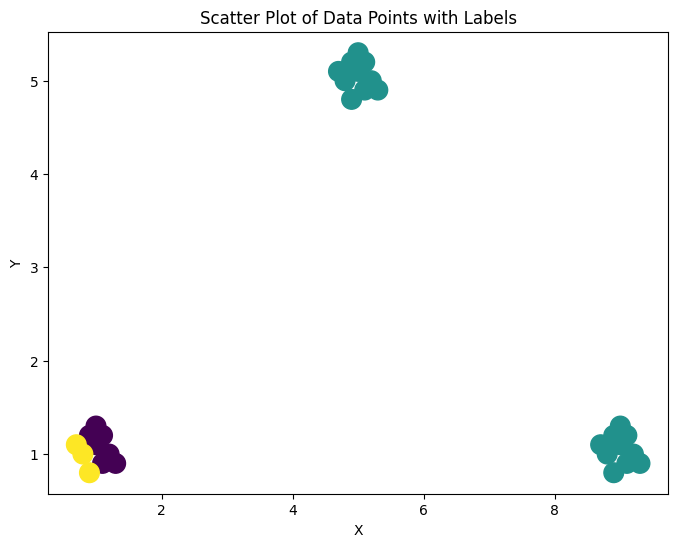

In [4]:
clusters = kmeans(a, 3, 0.1, 100)
draw_clusters(clusters)

In [5]:
image = cv2.imread('dog.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0

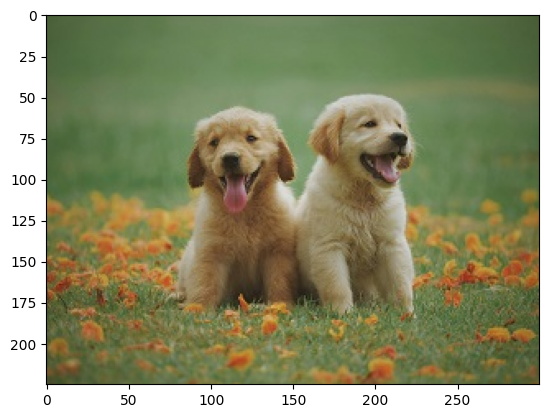

In [6]:
plt.imshow(image)

In [7]:
palette = np.array([
    [0, 0, 0],
    [0, 0, 0.5],
    [0, 0, 1],
    [0, 0.5, 0],
    [0, 0.5, 0.5],
    [0, 0.5, 1],
    [0, 1, 0],
    [0, 1, 0.5],
    [0, 1, 1],
    [0.5, 0, 0],
    [0.5, 0, 0.5],
    [0.5, 0, 1],
    [0.5, 0.5, 0],
    [0.5, 0.5, 0.5],
    [0.5, 0.5, 1],
    [0.5, 1, 0],
    [0.5, 1, 0.5],
    [0.5, 1, 1],
    [1, 0, 0],
    [1, 0, 0.5],
    [1, 0, 1],
    [1, 0.5, 0],
    [1, 0.5, 0.5],
    [1, 0.5, 1],
    [1, 1, 0],
    [1, 1, 0.5],
    [1, 1, 1]
])

In [8]:
palette.shape

(27, 3)

In [9]:
image.shape

(225, 300, 3)

In [10]:
def find_nearest(p, points):
    d = float('inf')
    idx = 0
    for i in range(len(points)):
        distance = dist(p, points[i])
        if distance < d:
            idx = i
            d = distance
    return idx

In [11]:
def reconstruct(img, palette):
    reconstructed = np.empty_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            nearest = find_nearest(img[i][j], palette)
            reconstructed[i][j] = palette[nearest]
    return reconstructed

In [12]:
reconstructed = reconstruct(image, palette)

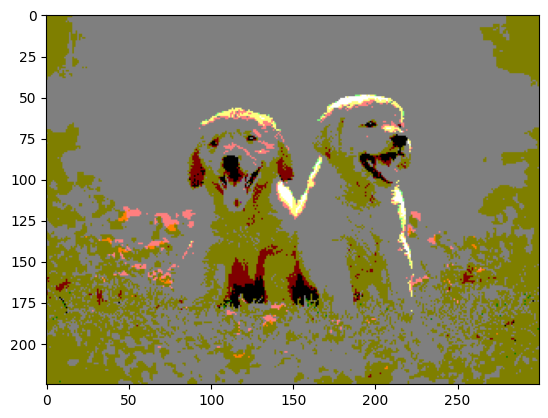

In [13]:
plt.imshow(reconstructed)

In [14]:
palette = []
pixels = image.reshape(-1, 3)
for _ in range(27):
    palette.append(random.choice(pixels))

In [15]:
palette

[array([0.41568627, 0.52941176, 0.34117647]),
 array([0.47843137, 0.4       , 0.27058824]),
 array([0.43921569, 0.5372549 , 0.38039216]),
 array([0.65882353, 0.49803922, 0.25490196]),
 array([0.64705882, 0.49019608, 0.21960784]),
 array([0.53333333, 0.47843137, 0.30196078]),
 array([0.55686275, 0.51764706, 0.28627451]),
 array([0.3254902 , 0.45490196, 0.27058824]),
 array([0.15294118, 0.16470588, 0.05882353]),
 array([0.44313725, 0.43137255, 0.27058824]),
 array([0.54901961, 0.49411765, 0.25490196]),
 array([0.41568627, 0.44313725, 0.24313725]),
 array([0.30588235, 0.36078431, 0.23137255]),
 array([0.4745098 , 0.48627451, 0.30980392]),
 array([0.36470588, 0.42745098, 0.2745098 ]),
 array([0.42745098, 0.54509804, 0.34901961]),
 array([0.41176471, 0.40392157, 0.21568627]),
 array([0.6       , 0.42352941, 0.2627451 ]),
 array([0.38823529, 0.46666667, 0.2745098 ]),
 array([0.40784314, 0.52156863, 0.33333333]),
 array([0.37254902, 0.27058824, 0.16470588]),
 array([0.70196078, 0.69803922, 0.

In [16]:
reconstructed = reconstruct(image, palette)

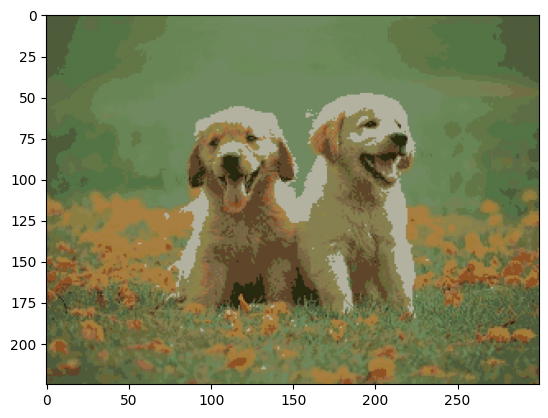

In [17]:
plt.imshow(reconstructed)

In [24]:
points = []
pixels = image.reshape(-1, 3)
for _ in range(1000):
    points.append(random.choice(pixels))

In [25]:
clusters = kmeans(points, 27, 0.1, 200)

0.015205125899787607
0.014122895488303215
0.01320797796762171
0.012288763164924473
0.01132293414887728
0.01047811676242787
0.009713414180187833
0.009003491459406252
0.008282057467690509
0.007749814379948264
0.0070859199540501145
0.006720896024506949
0.006245184955795851
0.005778031303961383
0.0054241220990937315
0.004974248173828807
0.004684643645957217
0.004435379722903371
0.004326266721320392
0.004165910807067458
0.003837132180922557
0.0034916202327393104
0.003449727764781138
0.0031725992894045224
0.0028725800331003627
0.0027856347144222383
0.002698278027670625
0.0025452153752364886
0.00238887484007801
0.002149987356070207
0.0019647973488301444
0.0017683176139471337
0.001654197350781681
0.001488777615703508
0.0014225904755661063
0.0013077177005396217
0.0015496045922884986
0.0015735423571524186
0.0014811878927336805
0.0013330691034603146
0.0012676495604257007
0.001151107757265286
0.0010359969815387563
0.0009323972833848788
0.0008564609259057068
0.0008556065729354951
0.0008266143131572

In [26]:
palette = []
for c in clusters:
    palette.append(c[0])

In [27]:
palette

[array([0.62962963, 0.57342048, 0.43747277]),
 array([0.72745098, 0.7127451 , 0.65980392]),
 array([0.40728291, 0.52436974, 0.33333334]),
 array([0.50490196, 0.39215687, 0.23921569]),
 array([0.54117647, 0.57254902, 0.37908497]),
 array([0.52579186, 0.61568627, 0.47390649]),
 array([0.13235294, 0.13333333, 0.09607843]),
 array([0.61344522, 0.45490205, 0.21288516]),
 array([0.54985994, 0.55462185, 0.32072829]),
 array([0.68745098, 0.64509804, 0.53960784]),
 array([0.55137255, 0.57411765, 0.41960784]),
 array([0.47843137, 0.60686274, 0.42843137]),
 array([0.77990196, 0.75686275, 0.67598039]),
 array([0.42745098, 0.42254902, 0.18333333]),
 array([0.39019608, 0.51176471, 0.31568627]),
 array([0.31016043, 0.41426025, 0.23351159]),
 array([0.3127451 , 0.45196078, 0.2627451 ]),
 array([0.73431371, 0.43137256, 0.2117647 ]),
 array([0.35254902, 0.46156863, 0.27176471]),
 array([0.63627451, 0.53382354, 0.29460785]),
 array([0.71372549, 0.7124183 , 0.63921569]),
 array([0.48347339, 0.56414566, 0.

In [28]:
reconstructed = reconstruct(image, palette)

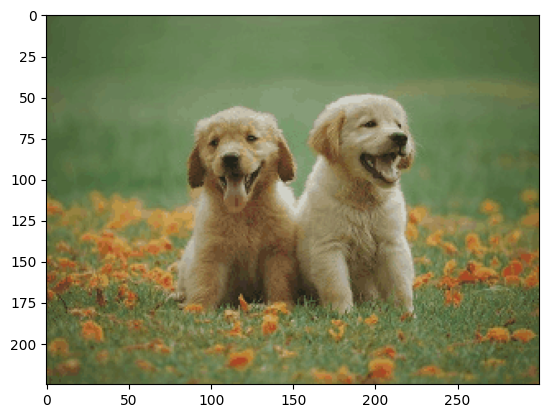

In [29]:
plt.imshow(reconstructed)